In [116]:
import pandas as pd
import numpy as np
import sklearn.naive_bayes as nb
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('shot_logs.csv')

In [72]:
features = [
    "SHOT_NUMBER",
    "PERIOD",
#     "GAME_CLOCK",
#     "SHOT_CLOCK",
    "DRIBBLES",
    "TOUCH_TIME",
    "SHOT_DIST",
    "PTS_TYPE",
    "CLOSE_DEF_DIST",
]
target = ['PTS']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25, random_state=42)

In [74]:
y = y_train.values.ravel()

In [75]:
model = nb.GaussianNB()

GaussianNB()

In [110]:
def predict(i=None):
    model.fit(X_train, y)
    return model.score(X_test, y_test)

In [111]:
def shuffle_y(i):
    '''
    Randomly shuffles training shot values in place, refits model then returns score
    '''
    np.random.shuffle(y)
    return predict()

In [113]:
actual = predict()
results = map(shuffle_y, range(10))

(array([ 1.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  1.,  3.]),
 array([ 0.54022737,  0.54083953,  0.54145168,  0.54206384,  0.54267599,
         0.54328815,  0.54390031,  0.54451246,  0.54512462,  0.54573677,
         0.54634893]),
 <a list of 10 Patch objects>)

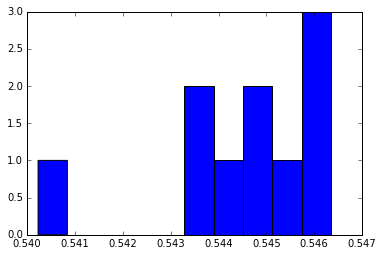

In [117]:
plt.hist(results)